# 🛰️ Voyager 1 turboSETI Tutorial 🛰️

*It's a bird, it's a plane, it's, it's... Voyager 1?!*

## 🌑 Introduction

The goal of this tutorial is to take you through the whole "SETI Pipeline". That is, to take
real data gathered by Breakthrough Listen at the [Green Bank Telescope](https://en.wikipedia.org/wiki/Green_Bank_Telescope) in West Virginia, run it through a few algorithms, and see if we can't dig up an alien or two!

Spoiler alert: If you do everything right you WILL find what appears to possibly be an alien! 👽

Second spoiler alert: It's not an alien 😔

But it *is* [Voyager 1](https://en.wikipedia.org/wiki/Voyager_1) 🛰️, the farthest human-made object from Earth! Which is still pretty freaking awesome if you ask me!

The process by which we find Voyager 1 will be nearly identical to the process you will use to search
for aliens in other data sets. So buckle up and listen close: It's time to look for ET!

## 📚 Background

**[Click here](https://youtu.be/EFxUHoXW1cA) to watch a helpful video about the summer research project that this tutorial is based on.**

One of the largest challenges in SETI's search is that human-generated radio frequency interference (RFI) from cell phones, Wi-Fi, radar, etc, is much more abundant and powerful than potential alien-generated signals. Therefore two primary techniques are used to quickly discriminate between human-made RFI and signals from outer space. They're pretty simple, effective, and understanding them is prerequisite for the rest of this tutorial. For a more thorough background discussion, [read through this document](https://github.com/UCBerkeleySETI/breakthrough/tree/master/GBT).

### Technique 1: Pointing the telescope ON and OFF Target (aka "Nodding")

   When a single dish radio telescope like Green Bank conducts an alien search, we program it to point directly at the target of interest (eg a star known to have an exoplanet in its "habitable zone") for 5 minutes, then point elsewhere for 5 minutes, then point back at the target for 5 minutes, then point some new place for 5 minutes, then back to the target for 5 minutes and finally 5 more minutes in a third new direction. If we call the observations pointing at the target "ON" observations and the observations pointing elsewhere "OFF" observations, the pattern looks like this:
   
   **1 "ON" --> 1 "OFF" --> 2 "ON" --> 2 "OFF" --> 3 "ON" --> 3 "OFF"**. In total, we do 3 five minute "ON" observations and 3 five-minute "OFF" observations, meaning the full search time for a particular target is half an hour!
    
   This is also referred to as an ABACAD pattern (for the alien-hunting songwriters amongst you, it could be fun to write a song about aliens with [the same song form](https://www.omarimc.com/a-complete-guide-to-song-form-structure-examples-aaba-aaa-abab-abac/) as a SETI-search ;-)
    
   Conducting the search in this manner takes advantage of the fact that **most RFI should appear regardless of which direction the telescope is pointed in, while signals from space should appear only when the telescope is pointed directly at them**. Therefore, if we see a signal present in all three ON target observations and absent in all three OFF target observations, we can be fairly confident that it's coming from space and not RFI!
    
### Technique 2: Nonzero Doppler Drift

   You may already be familiar with the concept of [Doppler Shift](https://en.wikipedia.org/wiki/Doppler_effect). But are you familiar with the concept of [Doppler *Drift*](http://seti.berkeley.edu:8000/doppler/)? In short, Doppler Shift is a *constant* shift in frequency due to a *constant* relative velocity between two objects, whereas Doppler Drift is a *changing* shift in frequency due to a *changing* relative velocity between two objects. Since the Earth is rotating and orbiting (and space targets like exoplanets have their own changing velocities), things in outer space have a changing relative velocity to the Earth. Meanwhile, Earthbound objects have a constant velocity relative to Earth (usually zero). Therefore, **most RFI does NOT have a Doppler Drift while outer space targets DO have Doppler Drift**.
   
We take advantage of this fact to get rid of more RFI by rejecting all signals that have zero Doppler Drift!

## ⛰️ Overview
    
Now that we have an understanding of the theory underlying the differences between RFI and alien signals, let's talk about how we analyze the data collected by our telescopes. You can think of the data as a massive (and I mean **MASSIVE**) haystack. Somewhere in the haystack there *might* be a needle--an alien signal. Our job is to get rid of all of the hay--without getting rid of the needle--so that we can see the needle! Not easy!!

For SETI, the process of sifting through the hay to find the needle (data analysis) can be broken down into five steps that look something like this:

> **1. 📡  telescope data** (in .h5 or filterbank format) --> **2. 👽 turboSETI** (outputs .dat) --> **3. 🌠 find_event_pipeline** (outputs Pandas and .csv) --> **4. 🌈 plot_event_pipeline** (outputs corresponding time vs frequency graph with power indicated by color for each of the find_event_pipeline hits you see in the Pandas dataframe) --> **5. 📻 plot_spectrum.py"** (outputs a power vs frequency graph)

Here's a quick explanation for each of these parts. The rest of this tutorial will go into more depth, but it's good to have an overview to start:

**1. 📡  telescope data**: The data that the telescope gathered should be stored somewhere in .h5 or filterbank format. For the purposes of this tutorial, I will assume we are using .h5 formatting but it shouldn't make a difference if you're using a filterbank file.

**2. 👽 turboSETI**: The main algorithm that processes the data collected from the telescopes in .h5 format and outputs
    .dat files. For this tutorial we'll intentionally be using small files so that you can use turboSETI with your computer at home. However, with the multiple Gigabyte-sized .h5 files from real radio telescope observations, turboSETI takes a long time to run (hours). See the turboSETI section below for how to handle these large files if you have permission to join UC Berkeley SETI servers.

**3. 🌠 find_event_pipeline.py**: The script that takes in turboSETI's .dat files and outputs a Pandas dataframe that includes all events above a certain threshold and a .csv file that you will manually input to plot_event_pipeline. When you think of find_event_pipeline.py,      picture something like this (this is what a Pandas dataframe looks like): 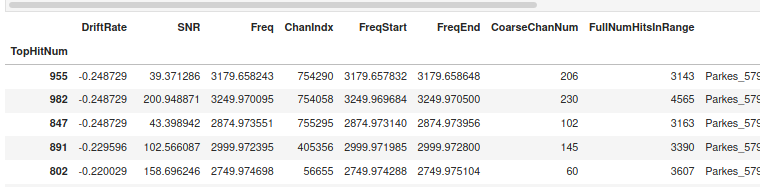
    
**4. 🌈 plot_event_pipeline.py**: This function takes in the output .csv from find_event_pipeline.py and a .lst of the .h5 data files that you make and gives you waterfall plots for each of the find_event_pipeline.py events that you see in the Pandas dataframe above! The plots are time vs frequency with power indicated by color. Importantly, as you can see below, there are six plots contained in one, corresponding to the six "ON/OFF" observations taken by the telescope. Each five minute (300 second) "ON" or "OFF" observation is separated by a horizontal black line. The uppermost five minute observation is the first "ON", followed underneath by the first "OFF", then the second "ON", etc. See for yourself: 

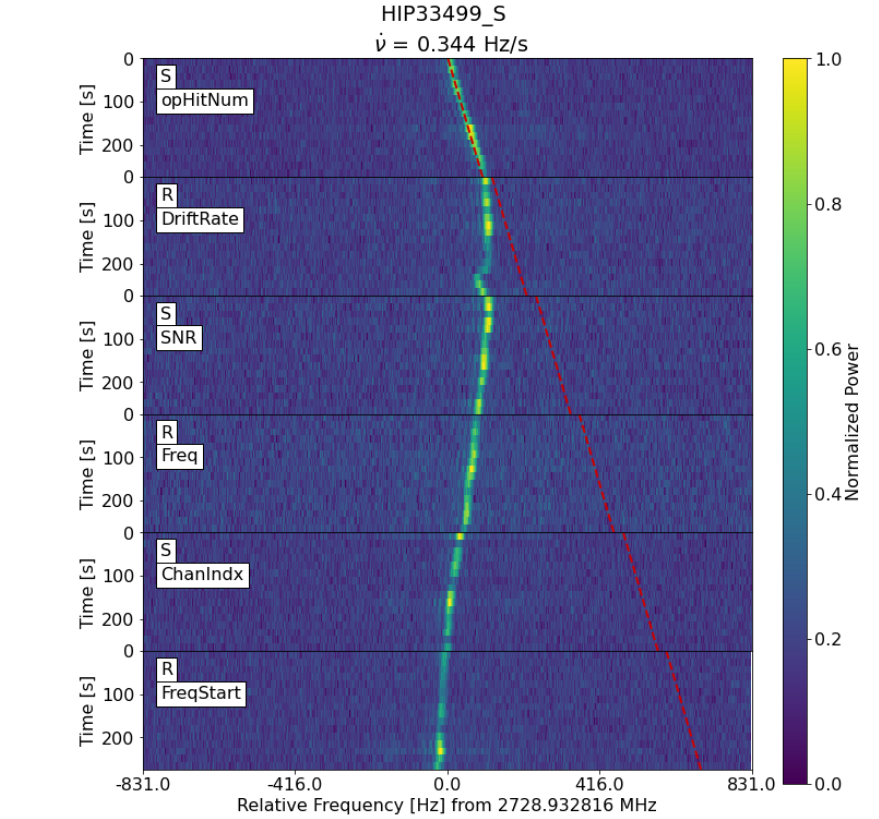

**5. 📻 plot_spectrum.py**: Input some telescope data (.h5 file) and a frequency range and `plot_spectrum` outputs a power vs frequency graph. Note that this black and white graph is giving you the SAME information as one of the six 300-second (in between two horizontal black lines) colorful waterfall plots from the previous section, but with time "collapsed" so that the signal's power is added over the whole time period and is represented by amplitude instead of color. It looks a little something like this:

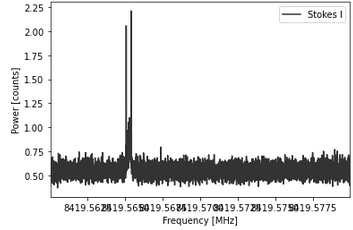

Alright, that's the overview! No time to waste--let's get going!

## 🚀 0. Setup
To start, open up your terminal. We're going to set up a new "conda environment", which is a collection of python packages that we can import in our code. The environment we create will be called turboSETI, and is described by the file `environment.yml` (another file in this repository). To create the environment, enter the following in your bash terminal:

```bash
# Create the environment from the definition file
conda env create -f environment.yml
# Activate the new environment
conda activate turboSETI
# Create a Jupyter "kernel" for this environment to make it accessible from a notebook
python -m ipykernel install --user --name=turboSETI
```

Now it's time to move into a Jupyter Notebook! 
Open this notebook in Jupyter or create a new one to follow along. 

**You need to select the turboSETI kernel** for your notebook by clicking on `Kernel > Change Kernel` in the top menu of Jupyter.

After you have your notebook running, we can import the Python libraries we'll need, and use `%matplotlib inline` to set up inline plotting

In [1]:
# Python standard library
import os
import glob

# 3rd party packages
import pylab as plt
from blimpy import Waterfall
import turbo_seti.find_doppler.seti_event as turbo
import turbo_seti.find_event as find
from turbo_seti.find_doppler.find_doppler import FindDoppler
from turbo_seti.find_event.find_event_pipeline import find_event_pipeline
from turbo_seti.find_event.plot_event_pipeline import plot_event_pipeline

# Local imports
import download_progress

%matplotlib inline

That's it for the Setup! For more information about turboSETI, see the [turboSETI README.](https://github.com/UCBerkeleySETI/turbo_seti/blob/master/README.md)
You may also want to reference [Shane Smith's turboSETI usage tutorial here.](https://github.com/UCBerkeleySETI/turbo_seti/blob/master/tutorial/turboSETI_tutorial.ipynb)

## 📡 1. Telescope Data

Next we need to get the Voyager 1 data collected by the Greenbank telescope on July 16th, 2020.

Let's first choose a directory to save these files in (or choose the directory where you already have them downloaded).
For simplicity, we'll also save all output files to this same directory.

In [2]:
# You can edit this variable to match whichever directory you will use to store your data files
data_directory = 'voyager_2020_data' 

### Download Voyager data files

In [3]:
# Read the necessary URLs from data_urls.lst
with open('data_urls.lst') as file:
    data_urls = file.read().splitlines()

# Download each one into a directory called 'data' if they aren't already present.
for url in data_urls:
    download_progress.download_file_with_progress_bar(url, download_dir=data_directory)

File 'voyager_2020_data/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5' already exists - not re-downloading http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5
File 'voyager_2020_data/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5' already exists - not re-downloading http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5
File 'voyager_2020_data/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5' already exists - not re-downloading http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5
File 'voyager_2020_data/single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5' already exists - not re-downloading http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_gu

The above cell should have downloaded all the data automatically.

You can also download the data manually here (it's in .h5 format and each file is ~50 MB):

[First ON Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5) single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5

[First OFF Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5) single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5

[Second ON Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5) single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5

[Second OFF Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5) single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5

[Third ON Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5) single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5

[Third OFF Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5) single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5

### List data files

To run turboSETI on the Voyager data we first need to create a list with the file names we downloaded.
We can do this using the "glob" function to put them in .lst format. 

The glob function takes all files with a given file extension in the specified directory and puts them in a list, so make sure the Voyager files are the only files of this type in your data directory before using it.

You could also do this by hand, copying and pasting the file names into a .lst file, but who wants to pass up a chance to glob?!

In [4]:
# Create a simple .lst file of the .h5 files in the data directory
h5_list = sorted(glob.glob(os.path.join(data_directory, '*.h5')))
    
# This writes the .h5 files into a .lst, as required by the find_event_pipeline:
h5_list_path = os.path.join(data_directory,'h5_files.lst')
with open(h5_list_path, 'w') as f:
    for h5_path in h5_list:
        f.write(h5_path + '\n')

# You don't have to print, but it's a good way to check that your list is in the correct order:
with open(h5_list_path, 'r') as f:
    print(f.read())

voyager_2020_data/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5
voyager_2020_data/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5
voyager_2020_data/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5
voyager_2020_data/single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5
voyager_2020_data/single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5
voyager_2020_data/single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5



## 👽 2. turboSETI
If, in an alternative universe, Breakthrough Listen were an enterprise software company instead of an open source project, one might be tempted to call turboSETI its "flagship workhorse program". After running Gigabytes of unfiltered data from the telescope through it, turboSETI returns *much* smaller .dat files with "hits". It's worth taking special mental note of what a "hit" is:

**A hit is any signal from the Voyager data that is above a specified signal to noise ratio (SNR) threshold and within a specified (nonzero) doppler drift rate range.**

Thus, turboSETI acts as an important initial data "sieve" that gets rid of a lot of unwanted signals that are too weak (too small of an SNR) or almost certainly coming from Earth (due to their zero Doppler drift rate).

You can and should control these important `max_drift` and `snr` parameters before running turboSETI! Changing them and re-running the program is a worthy exercise to see how they influence the number of hits you get. The difference between finding an extraterrestrial and finding your eccentric neighbor's ham radio very well may depend on which numbers you choose:

The **`max_drift`** parameter sets the maximum doppler drift rate turboSETI will search for. In this case we set it to 4 Hz/s. Since the min_drift parameter is defaulted to 0 Hz/s, turboSETI will look for signals that are drifting between 0 and 4 Hz/s. TurboSETI will NOT include signals with a 0 Hz/s drift rate since the whole point is to exclude signals from Earth!

The **`snr`** parameter sets the minimum signal to noise ratio turboSETI will return as a hit. The lower the snr threshold you set, the more hits you'll get since turboSETI returns all hits above this lower limit.

For reference, running the Voyager data through turboSETI with `maxdrift = 4` and `snr = 10` returns about 7,000 hits. Almost all of these hits are RFI that slipped through the cracks. That's why there's more work to be done after running turboSETI...

### Run turboSETI

Now that we have our files in a list we can run turboSETI with a for loop on them. This will take a minute or two on our six ~50 MB files but takes hours on the many Gigabyte-sized files turboSETI normally runs on.

**If you are running turboSETI on multiple Gigabyte-sized files and have permission, it's wise to connect to Berkeley's server using ssh and let the big computers do the work.** [Here's one](https://github.com/DominicL3/hey-aliens/blob/master/multihop-ssh.md) and [here's another](https://semaphoreci.com/community/tutorials/getting-started-with-ssh) useful resource for setting up ssh. Once logged in you can use [tmux](https://github.com/tmux/tmux/wiki) or [screen](https://linuxize.com/post/how-to-use-linux-screen/) to allow turboSETI to continue running while your computer is disconnected from the Berkeley server. [Here](https://www.hamvocke.com/blog/a-quick-and-easy-guide-to-tmux/) is a helpful guide for using tmux. The most important section is on "session handling". The basic idea is:

>Connect to Berkeley's server, activate tmux-->Run turboSETI-->detach from the session. You can then attach to the session again later to check if turboSETI is finished doing its thang!

After running turboSETI you should have a .dat file for each .h5 file you ran through it. These files are stored wherever you specify in the `out_dir = ` portion of the code. To make the next step easier, we'll save them in the same folder as the `.h5` files we downloaded.

In [5]:
for file in h5_list:
    doppler = FindDoppler(file,
                      max_drift = 4, # Max drift rate = 4 Hz/second
                      snr = 10,      # Minimum signal to noise ratio = 10:1
                      out_dir = data_directory # This is where the turboSETI output files will be stored.
                     )
    doppler.search()
    
print('\n===== All DAT files have been computed and a list of them has been constructed\n')

find_doppler    INFO     {'DIMENSION_LABELS': array(['time', 'feed_id', 'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 8421.38671875, 'foff': -2.7939677238464355e-06, 'machine_id': 20, 'nbits': 32, 'nchans': 1048576, 'nifs': 1, 'source_name': 'VOYAGER-1', 'src_dej': <Angle 12.40378167 deg>, 'src_raj': <Angle 17.21124472 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611007999982, 'tstart': 59046.92634259259, 'za_start': 0.0}
find_doppler    INFO     File: voyager_2020_data/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5
 drift rates (min, max): (0.000000, 4.000000)
 SNR: 10.000000

Starting ET search using voyager_2020_data/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5
find_doppler    INFO     Parameters: datafile=voyager_2020_data/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5, max_drift=4, min_drift=0.0, snr=10, out_dir=voyager_2020_data, coarse_chans=None, flagging=False, n_coarse_chan=None, kernels

### List turboSETI files

As with the `.h5` data files, we need to make a `.lst` file with a list of the `.dat` outputs from turboSETI for use in the next step.

In [6]:
# Create a simple .lst file of the .dat files in the data directory
dat_list = sorted(glob.glob(os.path.join(data_directory, '*.dat')))
    
# This writes the .dat files into a .lst, as required by the find_event_pipeline:
dat_list_path = os.path.join(data_directory, 'dat_files.lst')
with open(dat_list_path, 'w') as f:
    for dat_path in dat_list:
        f.write(dat_path + '\n')

# You don't have to print, but it's a good way to check that your list is in the correct order:
with open(dat_list_path, 'r') as f:
    print(f.read())

voyager_2020_data/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat
voyager_2020_data/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.dat
voyager_2020_data/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.dat
voyager_2020_data/single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.dat
voyager_2020_data/single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.dat
voyager_2020_data/single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.dat



Check to make sure the `.lst` list is in the correct order. It should be in the same order as the observations (First ON, First OFF, Second ON, Second OFF, Third ON, Third OFF).

## 🌠 3. find_event_pipeline

Now that we've run turboSETI on the data and gotten a list of hits, it's time to find "Events"! It's easy to get hits and events confused, so paste this in your hat or underwear, if you wear a hat or underwear:

**An event is a hit that occurs in more than one "ON" observation and does NOT occur in any of the "OFF" observations.**

So, events are a much bigger deal than hits. Most hits are noise that's loud enough and doppler drifting with respect to the telescope for whatever reason (perhaps a satellite). But events require that the same hit be present only when looking at the target, and not when looking away. One day an event may prove to be an alien saying "Where you been all my life Earthlings?!" Quite the event that would be!

So, how do we find events? Well, we use `find_event_pipeline` of course!

Importantly, `find_event_pipeline` allows you to choose a `filter_threshold` of 1, 2 or 3.

`filter_threshold = 1` returns **hits** that meet turboSETI's SNR/non-zero drift criteria, but with no ON/OFF check  
`filter_threshold = 2` reports **events** where a signal is found in at least one ON and is absent in all three OFFs
`filter_threshold = 3` report **events** where a signal was found in all three ONs and absent in all three OFFs

So `filter_threshold = 3` is the strictest setting. For an event to be worthy of serious further study it usually has to pass filter_threshold 3.

Also, note that `number_in_cadence` is the total number of ON and OFF target observations that occurred. For our Voyager observations (and most SETI searches), this number is 6 (three ONs and three OFFs).

Now, let's run `find_event_pipeline` on the list of `.dat` outputs from above:

In [7]:
#Using find_event_pipeline with filter threshold 3 to detect Voyager!
csvf_path = os.path.join(data_directory, 'found_event_table.csv')
find_event_pipeline(dat_list_path, 
                    filter_threshold = 3, 
                    number_in_cadence = len(dat_list), 
                    csv_name=csvf_path, 
                    saving=True)


************   BEGINNING FIND_EVENT PIPELINE   **************

Assuming the first observation is an ON
find_event_pipeline: source_name = VOYAGER-1
find_event_pipeline: source_name = VOYAGER-1
find_event_pipeline: source_name = VOYAGER-1
find_event_pipeline: source_name = VOYAGER-1
find_event_pipeline: source_name = VOYAGER-1
find_event_pipeline: source_name = VOYAGER-1
There are 6 total files in the filelist voyager_2020_data/dat_files.lst
therefore, looking for events in 1 on-off set(s)
with a minimum SNR of 10
Present in all ON sources with RFI rejection from the OFF sources
not including signals with zero drift
saving the output files

*** First DAT file in set:  single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat ***

------   o   -------
Loading data...
Loaded 3 hits from voyager_2020_data/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat (ON)
Loaded 0 hits from voyager_2020_data/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000

,TopHitNum,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,...,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range,delta_t
0,1,-0.363527,22.328960,8419.565390,651879,8419.567024,8419.563761,0,23111,single_coarse_guppi_59046_80036_DIAG_VOYAGER-1...,...,59046.926342592589,17h12m40.481s,12d24m13.614s,18.253611,-2.793968,VOYAGER-1_0,on_table_1,2,0,0.0
3,1,-0.401793,10.996473,8419.565152,651964,8419.566787,8419.563523,0,689,single_coarse_guppi_59046_80672_DIAG_VOYAGER-1...,...,59046.933703703704,17h12m40.482s,12d24m13.656s,18.253611,-2.793968,VOYAGER-1_0,on_table_2,,0,636.0
6,1,-0.411359,18.529706,8419.564890,652058,8419.566524,8419.563261,0,4819,single_coarse_guppi_59046_81310_DIAG_VOYAGER-1...,...,59046.941087962965,17h12m40.477s,12d24m13.608s,18.253611,-2.793968,VOYAGER-1_0,on_table_3,,0,1274.0
1,2,-0.353960,192.893808,8419.542731,659989,8419.544365,8419.541102,0,23111,single_coarse_guppi_59046_80036_DIAG_VOYAGER-1...,...,59046.926342592589,17h12m40.481s,12d24m13.614s,18.253611,-2.793968,VOYAGER-1_1,on_table_1,2,0,0.0
4,2,-0.382660,82.802052,8419.542493,660074,8419.544128,8419.540864,0,689,single_coarse_guppi_59046_80672_DIAG_VOYAGER-1...,...,59046.933703703704,17h12m40.482s,12d24m13.656s,18.253611,-2.793968,VOYAGER-1_1,on_table_2,,0,636.0
7,2,-0.430492,145.125469,8419.542236,660166,8419.543871,8419.540607,0,4819,single_coarse_guppi_59046_81310_DIAG_VOYAGER-1...,...,59046.941087962965,17h12m40.477s,12d24m13.608s,18.253611,-2.793968,VOYAGER-1_1,on_table_3,,0,1274.0


Seeing the above table populated is very exciting!!! With the `find_event_pipeline` filter threshold set to 3, it means there are candidate aliens in our data!!!!!!!!! Woooohoooo!!!

You should know that this table is a Pandas dataframe and that `find_event_pipeline` also spits out a .csv file that we'll use in a minute. Notice that there are six events--one per row. Why six? Because Voyager appears to be emitting at TWO different frequencies and we detected each of them three times--once for each of the three ON observation. (Later in this tutorial you'll see that we actually *missed* a third frequency that Voyager is emitting at because its SNR is a little below the `snr = 10` threshold we set when we ran turboSETI!)

If you look at the fourth labeled column **Freq** closely you'll see what the two frequencies are: one at ~ 8419.56 Hz and another at ~ 8419.54 Hz. Pop Quiz: Why does each frequency change slightly? (Hint: Doppler Drift).

Take a moment to study the other columns as well. Notice, for example, that all the SNR numbers are above 10, as per our requirement when we ran turboSETI.

## 🌈 4. plot_event_pipeline


Now it's time to visualize the events that we just found with waterfall plots. The oh-so-colorful `plot_event_pipeline` function allows us to do this.

`plot_event_pipeline` takes the output .csv from `find_event_pipeline.py` and the .lst of .h5 files that we made and gives waterfall plots for each of the `find_event_pipeline.py` events that we saw before in the Pandas dataframe.

The waterfall plots are time vs frequency with power indicated by color. As you can see below, there are six plots contained in one, corresponding to the six "ON/OFF" observations taken by the telescope. Each five minute (300 second) "ON" or "OFF" observation is separated by a horizontal black line. Time moves downward: The uppermost five minute observation is the first "ON", followed underneath by the first "OFF", then the second "ON", etc.

The dashed red line is the slope of the drift rate from the first ON observation, indicating where you would expect the signal to be in the second and third ON observations if the drift rate stayed constant throughout the whole 30 minute observation period.

plot_event_pipeline: Opened file voyager_2020_data/found_event_table.csv
plot_event_pipeline: source_name=VOYAGER-1
plot_event_pipeline: source_name=VOYAGER-1
plot_event_pipeline: source_name=VOYAGER-1
plot_event_pipeline: source_name=VOYAGER-1
plot_event_pipeline: source_name=VOYAGER-1
plot_event_pipeline: source_name=VOYAGER-1
Plotting some events for:  VOYAGER-1
There are 6 total events in the csv file voyager_2020_data/found_event_table.csv
therefore, you are about to make 6 .png files.


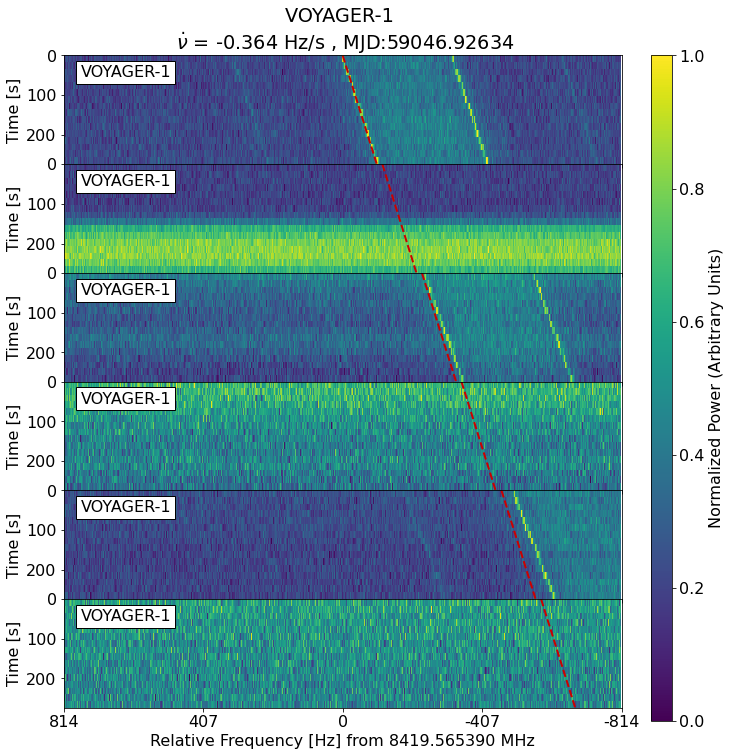

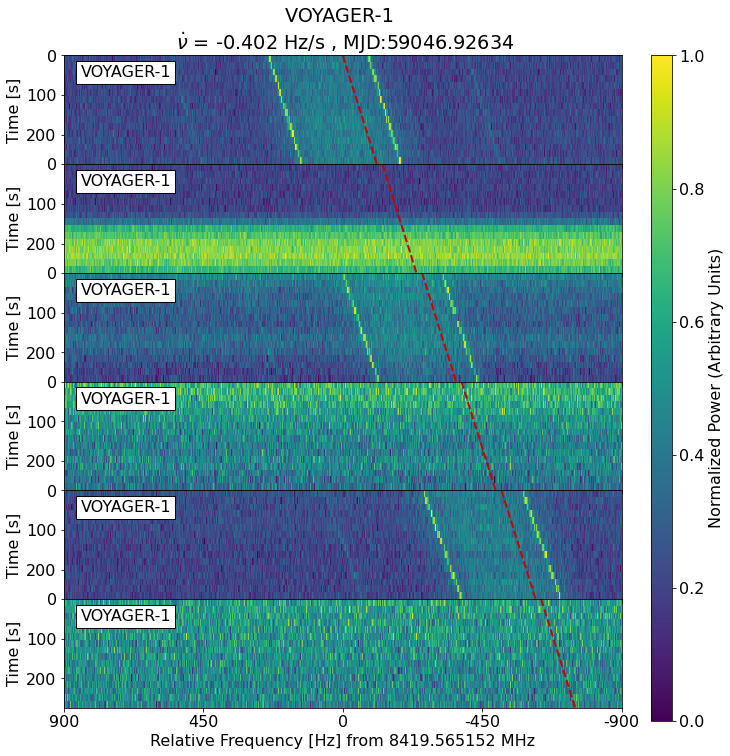

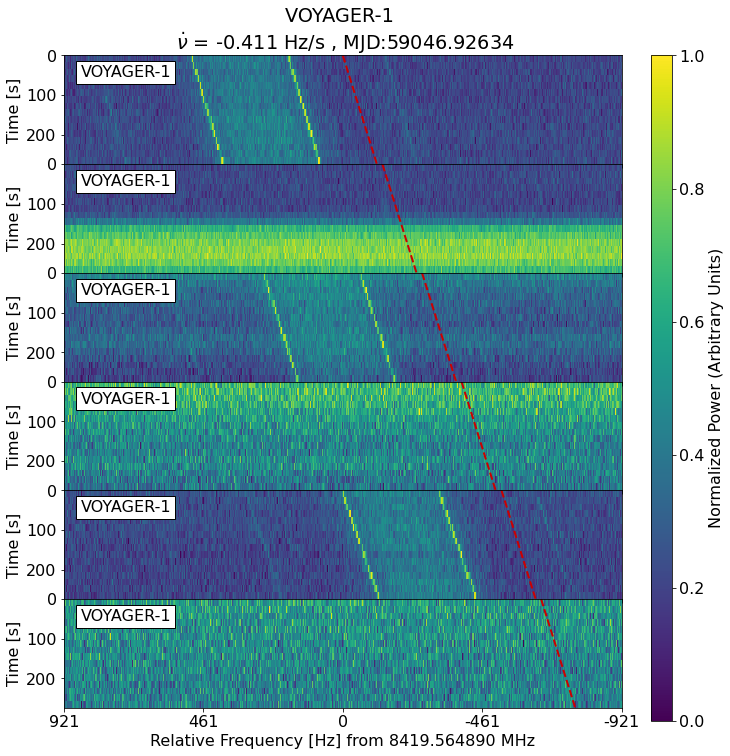

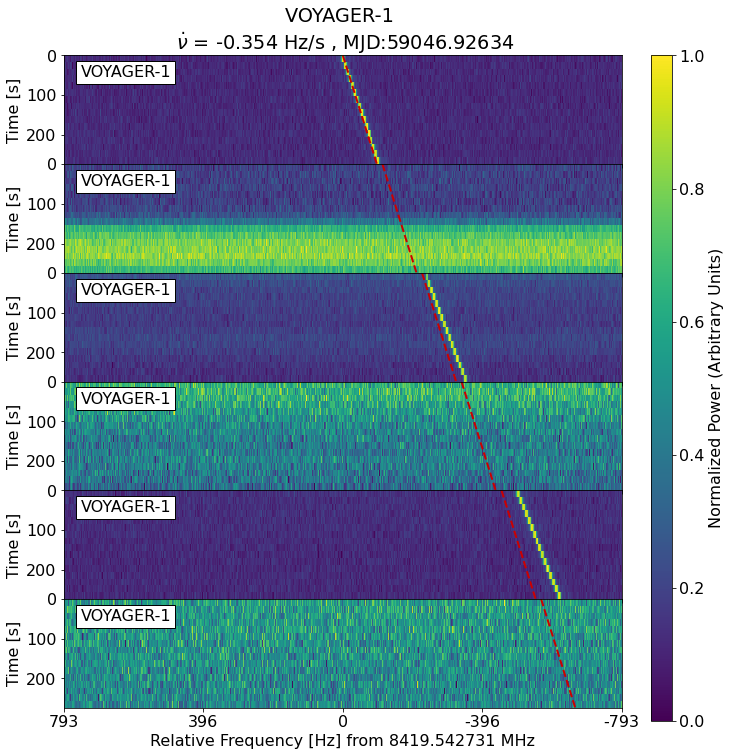

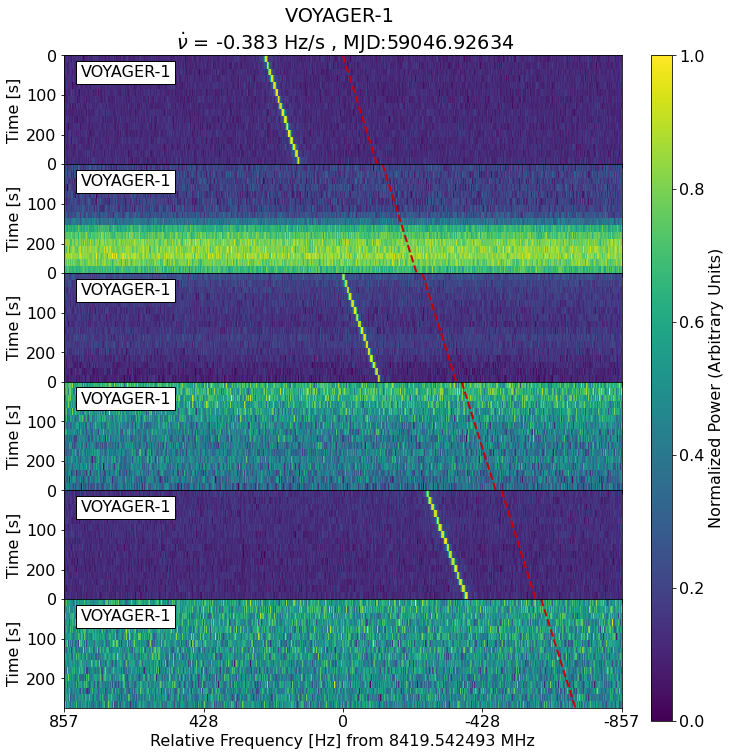

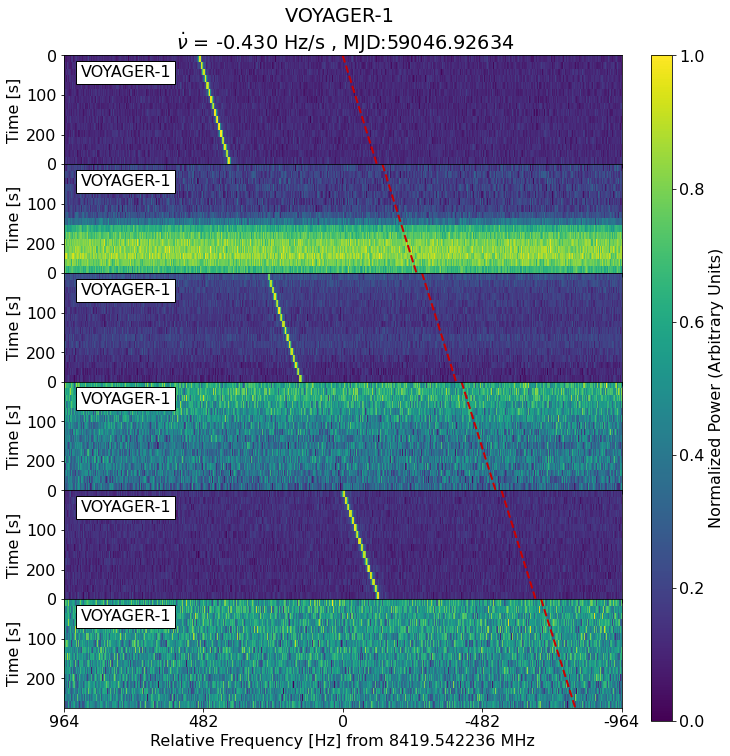

In [8]:
# and finally we plot
plot_event_pipeline(csvf_path, # full path of the CSV file built by find_event_pipeline()
                    h5_list_path, # full path of text file containing the list of .h5 files
                    filter_spec='f{}'.format(3), # filter threshold
                    user_validation=False) # Non-interactive


## 📻 5. plot_spectrum

Another important visual analysis tool available to us is the `plot_spectrum` function which allows us to zoom in on any frequency range to take a closer look. If you find any events, you'll want to zoom in on those frequency ranges with `plot_spectrum`!

Input some telescope data (.h5 file) and a frequency range and `plot_spectrum` outputs a power vs frequency graph. Note that this black and white graph is giving you the SAME information as one of the six 300-second (in between two horizontal black lines) colorful waterfall plots from the previous section, but with time "collapsed" so that the signal's power is added over the whole time period and is represented by amplitude instead of color.

extracting integration 0...


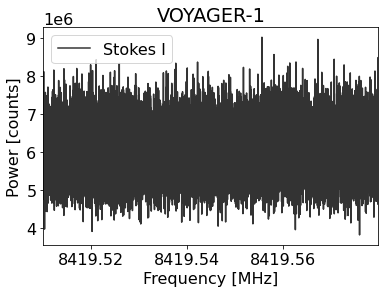

In [9]:
#Plotting spectrum for first OFF observation:
file_path = h5_list[1] # 2nd element of the list
f_start = 8419.51
f_stop = 8419.58
obs = Waterfall(file_path, f_start, f_stop)

obs.plot_spectrum(f_start=f_start, f_stop=f_stop)

extracting integration 0...


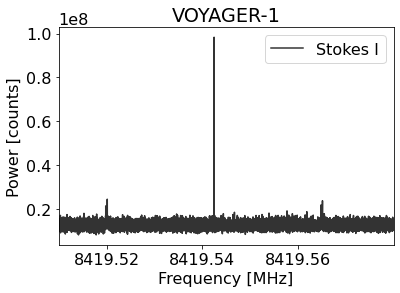

In [10]:
#Plotting spectrum for second ON observation:

file_path = h5_list[2] # 3rd element of the list
f_stop = 8419.58
obs = Waterfall(file_path, f_start, f_stop)

obs.plot_spectrum(f_start=f_start, f_stop=f_stop)

extracting integration 0...


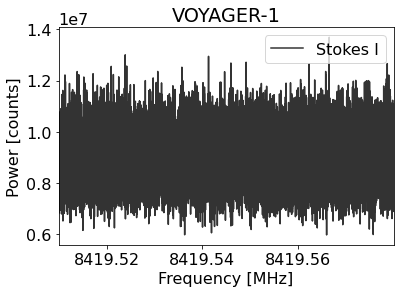

In [11]:
#Plotting spectrum for second OFF observation:

file_path = h5_list[3] # 4th element of the list
f_start = 8419.51
f_stop = 8419.58
obs = Waterfall(file_path, f_start, f_stop)

obs.plot_spectrum(f_start=f_start, f_stop=f_stop)

extracting integration 0...


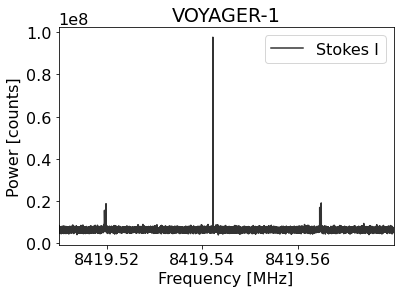

In [12]:
#Plotting spectrum for third ON observation:

file_path = h5_list[4] # 5th element of the list
f_start = 8419.51
f_stop = 8419.58
obs = Waterfall(file_path, f_start, f_stop)

obs.plot_spectrum(f_start=f_start, f_stop=f_stop)

extracting integration 0...


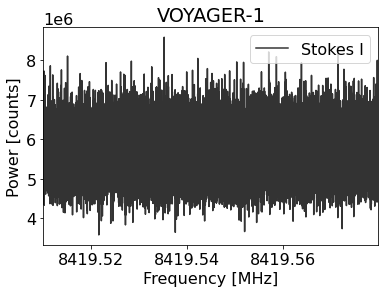

In [13]:
#Plotting spectrum for third OFF observation:

file_path = h5_list[5] # 6th element of the list
f_start = 8419.51
f_stop = 8419.58
obs = Waterfall(file_path, f_start, f_stop)

obs.plot_spectrum(f_start=f_start, f_stop=f_stop)

You'll notice that in the ON observations there appear to be THREE noteworthy frequencies, not just the two we saw in the table from `find_event_pipeline`! (The tall spike is the carrier frequency and the two smaller spikes are sidebands with information about Voyager 1).

It seems that when we ran turboSETI with `snr = 10` we missed one of these sidebands! Try running turboSETI again with a lower snr and see if you get three more events when you pass that data through `find_event_pipeline` (remember, one event times three ON observations = three events)!

This example really illustrates the importance of playing around with your snr threshold and visualizing your data once you've found events using `plot_spectrum`!

## 🛸 Final Project: Find Your Own Alien!

Congratulations! You've succesfully completed the turboSETI pipeline walkthrough and found an almost-alien! Now that your appetite is whetted, why not search for a *real* alien?!

Breakthrough Listen has collected huge amounts of data, and we're continually working to refine our processing algorithms, so it's entirely possible there's an alien message that's hiding in the data that's already stored on our servers that's just waiting for you to find it!

That's where you and your spiffy new turboSETI skills come in! Breakthrough Listen is an open-source and open-data project, which means that most of the data it has collected is publicly available! Navigate to http://seti.berkeley.edu/opendata. Then click on "Advanced Search Options" and uncheck all the boxes except for GBT and .hdf5 to make sure that you're getting similar files to the ones we've used in this tutorial. Then pick a dataset--any dataset! Just make sure you pay attention to the file size. You probably don't want to download any Gigabyte-sized files on your own machine...

Now go through the whole turboSETI pipeline: Download an `.h5` data file, run turboSETI on it, then run `find_event_pipeline` on the `.dat` files from turboSETI and make your plots!

Remember, you can vary the `snr` and `max_drift` parameters when running turboSETI to expand/contract your search. You can also vary the `find_event_pipeline` threshold to include/exclude more RFI. If you find any events at threshold 3, well... maybe let us know ;-) bsrc@berkeley.edu

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>

## 🧮 Bonus Physics Activity: Voyager's Velocity and Acceleration Relative to Earth!

Another fun thing we can do is combine our data with some physics to find Voyager's relative velocity and acceleration to Earth!

### Voyager's Relative Velocity to Earth

We'll use the Doppler Shift Equation for light:

$$v = \left(\frac{f_s - f_0}{f_0}\right)c$$

where $f_s$ is the observed Doppler shifted frequency and $f_0$ is the original unshifted frequency Voyager emits at.

Since Voyager is traveling away from us, we expect a frequency "Redshift". That is, the observed frequency should be less than the emitted frequency.

Looking at the [official documentation](https://voyager.gsfc.nasa.gov/Library/DeepCommo_Chapter3--141029.pdf) we can see that Voyager 1 emits at a "coherent downlink frequency" of $f_0 = 8420.432097 MHz$.

Looking at our data (the first event, for example), we can see that the Green Bank Telescope observed Voyager at about $f_s = 8419.5654 MHz$. Indeed, the observed frequency is lower (redshifted)!

Plug in the numbers to the Doppler formula--what velocity do you get? (I calculated 30.974 km/s). This is the speed Voyager was moving relative to Earth during the observation!

Now compare the velocity you found to NASA Jet Propulsion Laboratory's (JPL)! Go to [JPL Ephemeris](https://ssd.jpl.nasa.gov/horizons.cgi) and click to change the "target body" to Voyager 1. Then click to change the "time span". You'll have to click on "switch to descrete-times form" to manually enter the Mean Julian Date (MJD) of the date/time we observed Voyager. You can find the MJD at the top of a Waterfall plot. Once you've adjusted these, click "generate ephemeris" and scroll down. You should see a column labeled "deldot". This is JPL's calculation for Voyager 1's speed relative to Earth at the specified time. Now you can answer these questions, if you dare:

1. How does the velocity you calculated compare to JPL's? What's the percentage difference? What do you think might explain this difference?

2. When one Googles "Voyager 1 velocity" it says ~17 km/s. Explain this apparent discrepancy with our results.

### Voyager's Relative Acceleration to Earth

Taking the derivative with respect to time of the Doppler Shift Equation gives us what we might call the "Doppler Drift Equation":


$$\frac{dv}{dt} = \frac{d}{dt}\left(\frac{f_s - f_0}{f_0}\right)c$$

Since $f_0$ and $c$ are constants, we can rewrite the equation:

$$\frac{dv}{dt} = \frac{c}{f_0} \frac{d}{dt}f_s$$

Notice that the time derivate of frequency shift $\frac{d}{dt}f_s$ is what we've been calling the drift rate, $\dot{v}$ ! You can find this at the top of a Waterfall plot.

Plug in numbers from our data to find Voyager's acceleration $\frac{dv}{dt}$ relative to Earth. What do you find?

I calculated a relative acceleration of $1.3 x 10^{-5} km/s^{2}$.

1. Does Voyager's relative acceleration make sense given your recently acquired knowledge of its relative velocity? Why or why not? (Hint: Use JPL's ephemeris data for the velocity change over a 5 minute span).

2. What are all the possible sources of relative acceleration between Earth and Voyager that you can think of?

## 🌌 Conclusion

The Breakthrough Listen project paired with the ever-expanding catalog of confirmed exoplanets in their stars' "habitable zones" continues to grow the likelihood of first [Contact](https://www.youtube.com/watch?v=SRoj3jK37Vc). In fact, the probability is also increased by the simple fact that you have interacted with this tutorial, can share the ideas with others, and can perform your own analyses with turboSETI!

We found Voyager 1 and *only* Voyager 1 from over 7,000 RFI signal hits during the observation--that's pretty darn good!

It's important to remember though, that Voyager is emitting exactly the type of signal that turboSETI is good at finding: narrowband (single frequency) Doppler drifting signals. But aliens may be broadcasting more complex signals, so Breakthrough Listen is developing machine learning algorithms to catch a broader set of unusual patterns in the data.

Who says you can't find a needle in a haystack--or an alien in a galaxy?

## 🌍 Gratitude

Many thanks to Dr. Steve Croft, Oliver Evans, Richard Elkins, Shane Smith, Ellie White, Nikhita Madhanpall and all other earthlings and aliens alike! ❤️❤️❤️🦋🐙🐍🐻👽❤️❤️❤️

## 🪐 Further Reference

*    [First Voyager Tutorial](https://github.com/UCBerkeleySETI/blimpy/blob/master/examples/voyager.ipynb)
*    [Shane Smith's turboSETI Tutorial](https://github.com/UCBerkeleySETI/turbo_seti/blob/master/tutorial/turboSETI_tutorial.ipynb)